In [78]:
import seaborn as sns
import pandas as pd
from tqdm import tqdm
import matplotlib_inline.backend_inline as mpl_inline
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style('ticks')
mpl_inline.set_matplotlib_formats('svg')
%matplotlib inline
tqdm.pandas()

In [204]:
#### MADE THESE CHANGES ON NOV 19
data_path = "../data/processed/gutenberg_corpus_wc.csv"
THERAPY_COLUMNS = ['trauma', 'traumatic',
       'traumatized', 'traumatizing', 'ptsd', 'depression', 'great depression',
       'depressed', 'suicidal', 'depressing', 'anxiety', 'ocd',
       'obsessive compulsive disorder', 'schizophrenia', 'bipolar',
       'bipolar disorder', 'psychosis', 'psychotic']

In [206]:
df = pd.read_csv(data_path)
df = df.query('word_count < 150000') # remove outliers

In [124]:
# count items where word_count is null
print(df['word_count'].isnull().sum())
# drop rows where word_count is null or 0
df = df[df['word_count'].notnull() & (df['word_count'] != 0)]
print(df['word_count'].notnull().sum())

0
28959


<AxesSubplot: title={'center': 'Therapy Words in Books'}, xlabel='year_published'>

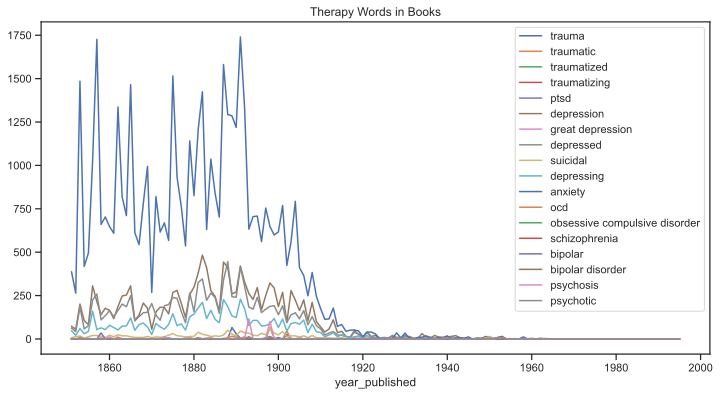

In [189]:
# OFF TRACK
groups = []
for col in THERAPY_COLUMNS:
    group = df.groupby('year_published').agg({col: 'sum'})
    group = group.reset_index()
    group.columns = ['year_published', col]
    groups.append(group)
for group in groups[1:]:
    groups[0] = groups[0].merge(group, on='year_published', how='left')
year_published_group = groups[0]
year_published_group = year_published_group.query('year_published > 1850')
year_published_group = year_published_group.fillna(0)
year_published_group.plot(x='year_published', y=THERAPY_COLUMNS, figsize=(12, 6), title='Therapy Words in Books')

In [187]:
year_published_group.to_csv('../data/processed/EX_gutenburg_words_by_year.csv')

In [186]:
# ON TRACK

,trauma,depression
366,0.004149,0.612725


In [200]:
# relative frequency calculation. Calculated per 100,000 words
def relative_frequency(*params):
    raw_freq, corpus_size = params
    corpus_size = df['word_count'].sum()
    return (raw_freq/corpus_size) * 1_00_000
# for column in tqdm(THERAPY_COLUMNS):
#     df[f'normalized_{column}'] = df[[column, 'word_count']].apply(lambda x: relative_frequency(*x), axis=1)


100%|██████████| 18/18 [00:45<00:00,  2.51s/it]


In [201]:
## Group therapy words by year and normalize to 1_00_000
corpus_size = df['word_count'].sum()
groups = []
for col in THERAPY_COLUMNS:
    group = df.groupby('year_published').agg({col: 'sum', 'word_count': 'sum' }).apply(lambda x: relative_frequency(*x), axis=1)
    group = group.reset_index()
    group.columns = ['year_published', col]
    groups.append(group)
for group in groups[1:]:
    groups[0] = groups[0].merge(group, on='year_published', how='left')

normalized_data_by_year = groups[0]

In [202]:
# covert year_published to int
normalized_data_by_year['year_published'] = normalized_data_by_year['year_published'].astype(int)
# only keep data where year_published is greater than 1750
normalized_data_by_year = normalized_data_by_year[normalized_data_by_year['year_published'] > 1850]
# normalized_data_by_year = normalized_data_by_year[normalized_data_by_year['year_published'] < 1950]
# normalized_data_by_year.to_csv("../data/processed/normalized_gutenberg_corpus_by_year.csv", index=False)

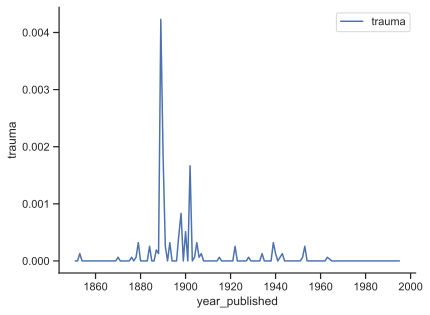

In [203]:
### PLOTS
# 1. Line plot of year_published against trauma, traumatic, traumatized, traumatizing on the same sns plot
# with smoothing set to order 2 and ci set to 95
sns.lineplot(x='year_published', y='trauma', data=normalized_data_by_year, label='trauma')
# sns.lineplot(x='year_published', y='traumatic', data=normalized_data_by_year, label='traumatic')
# sns.lineplot(x='year_published', y='traumatized', data=normalized_data_by_year, label='traumatized')
sns.despine()

In [ ]:
### END OF NOV 19 CHANGES